#AULA 04

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
from string import ascii_letters
import numpy as np
sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

uri = "https://raw.githubusercontent.com/guilhermesilveira/enem-2018/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv"
dados = pd.read_csv(uri)
dados.head()


NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  ... Q025  Q026 Q027
0  180009327796    2018                  2112209  ...    B     A    A
1  180012890374    2018                  3557105  ...    B     D    D
2  180008223824    2018                  2506301  ...    B     A    E
3  180007859645    2018                  3534807  ...    A     B    A
4  180013499517    2018                  3523107  ...    B     A    A

[5 rows x 137 columns]

In [0]:
len(dados)

137844

In [0]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

In [0]:
dados.describe()

NU_INSCRICAO     NU_ANO  ...  NU_NOTA_REDACAO       Q005
count         137,844.00 137,844.00  ...       103,774.00 137,844.00
mean  180,010,423,553.31   2,018.00  ...           509.13       3.90
std         1,918,950.00       0.00  ...           187.01       1.51
min   180,007,186,686.00   2,018.00  ...             0.00       1.00
25%   180,008,761,760.75   2,018.00  ...           360.00       3.00
50%   180,010,373,993.50   2,018.00  ...           520.00       4.00
75%   180,012,032,768.50   2,018.00  ...           620.00       5.00
max   180,014,002,596.00   2,018.00  ...         1,000.00      20.00

[8 rows x 94 columns]

In [0]:
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
dados_notas = dados[colunas_de_notas].dropna()
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas','linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

ciencias_naturais  ciencias_humanas  linguagem_codigo  matematica  redacao
1             523.10            671.30            661.60      738.00   680.00
2             409.20            531.70            389.00      438.10   600.00
3             452.30            505.50            448.50      544.90   400.00
6             428.50            505.20            521.00      436.80   560.00
8             491.80            575.70            524.40      487.60   660.00

In [0]:
len(dados_notas)

97270

In [0]:
corr = dados_notas.corr()
print(corr)

                   ciencias_naturais  ciencias_humanas  ...  matematica  redacao
ciencias_naturais               1.00              0.57  ...        0.58     0.51
ciencias_humanas                0.57              1.00  ...        0.53     0.50
linguagem_codigo                0.60              0.70  ...        0.57     0.56
matematica                      0.58              0.53  ...        1.00     0.48
redacao                         0.51              0.50  ...        0.48     1.00

[5 rows x 5 columns]


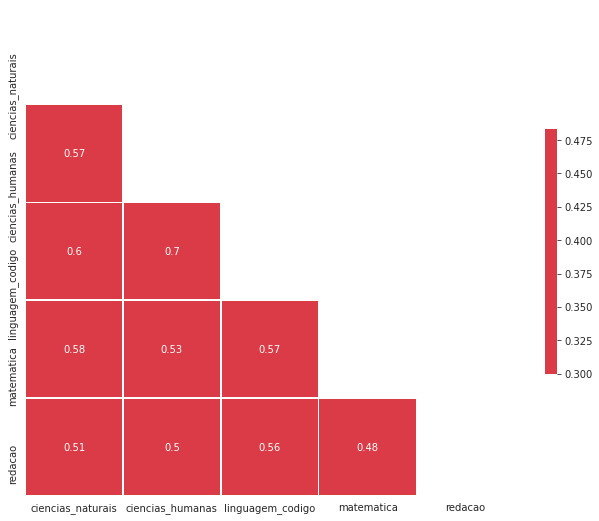

In [0]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

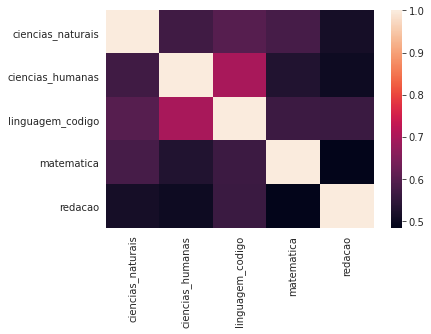

In [0]:
sns.heatmap(corr)

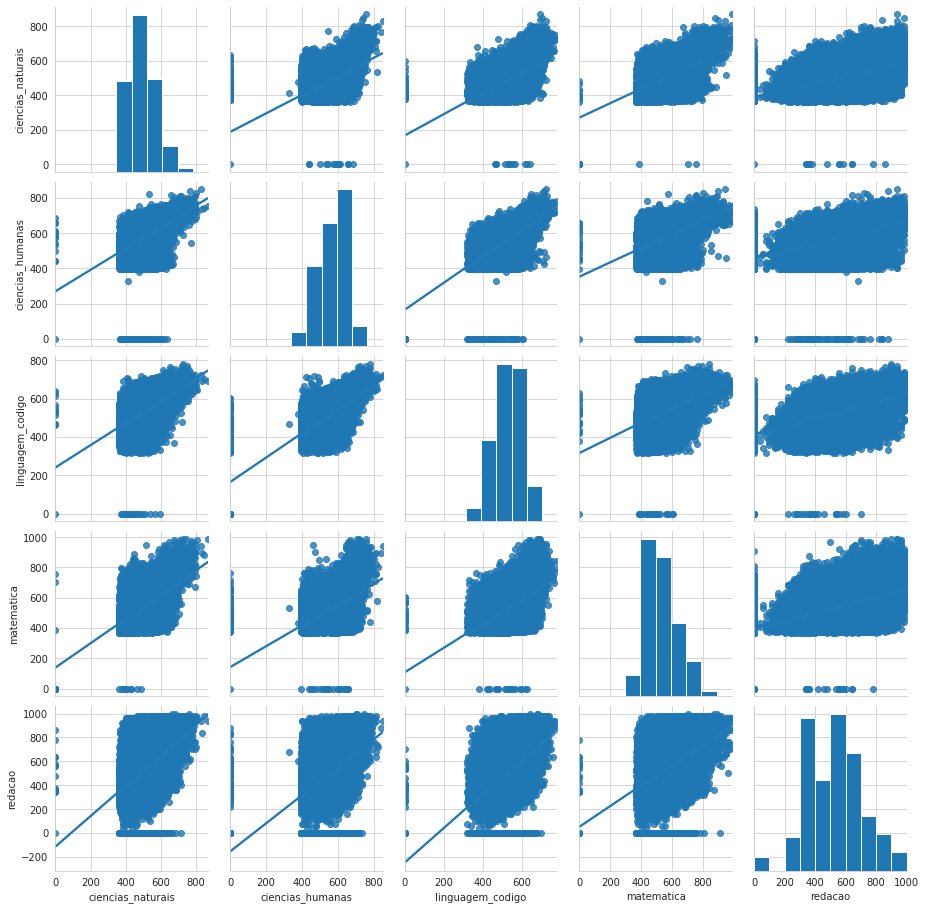

In [0]:
#pode demorar
sns.pairplot(dados_notas, kind="reg")

In [0]:
#dados_notas.query("matematica > 0 and redacao >0 and...")


##DESAFIOS AULA04

##Desafio 1: Se a pessoa não teve presença, preencher a nota da pessoa com 0 - (salvar em outro dataset)

In [0]:
#trabalhando com o notebook da Giulia
# criando um dataframe com as notas e presenca
#dados_copia = dados.copy()
#colunas_presenca_notas = ['NU_NOTA_CN','TP_PRESENCA_CN', 'NU_NOTA_CH','TP_PRESENCA_CH', 'NU_NOTA_LC','TP_PRESENCA_LC', 'NU_NOTA_MT','TP_PRESENCA_MT', 'NU_NOTA_REDACAO']
#notas_presenca = dados_copia[colunas_presenca_notas]

base_de_trabalho = dados.copy()
base_presenca_com_notas = ['NU_NOTA_CN','TP_PRESENCA_CN', 'NU_NOTA_CH','TP_PRESENCA_CH', 'NU_NOTA_LC','TP_PRESENCA_LC', 'NU_NOTA_MT','TP_PRESENCA_MT', 'NU_NOTA_REDACAO']
notas_x_presenca = base_de_trabalho[base_presenca_com_notas]
notas_x_presenca.head()

NU_NOTA_CN  TP_PRESENCA_CN  ...  TP_PRESENCA_MT  NU_NOTA_REDACAO
0         nan            0.00  ...            0.00              nan
1      523.10            1.00  ...            1.00           680.00
2      409.20            1.00  ...            1.00           600.00
3      452.30            1.00  ...            1.00           400.00
4         nan            0.00  ...            0.00              nan

[5 rows x 9 columns]

In [0]:
#conferindo o tamanho da amostra antes de retirar os nan de tipo de presença
notas_x_presenca = base_de_trabalho[base_presenca_com_notas]
len(notas_x_presenca)

137844

In [0]:
#caso não houvesse uma condicionante para zerar os dados  de notas
#dados2.update(dados2[colunas_de_notas].fillna(0))


In [0]:
# descobrindo quais valores aparecem nas colunas 
notas_x_presenca['TP_PRESENCA_CN'].unique()
# 0 faltou
# 1 presente
# 2 eliminado
# nan - ERROR

array([ 0.,  1.,  2., nan])

In [0]:
# df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'
#zerando os valores apenas dos não presentes e eliminados- permite aplicação em vários DF
def altera_colunas_com_loc(df, prova, nota):
  df.loc[df[f'TP_PRESENCA_{prova}'] == 0, f'NU_NOTA_{nota}'] = float(0)
  df.loc[df[f'TP_PRESENCA_{prova}'] == 2, f'NU_NOTA_{nota}'] = float(0)


In [0]:

# CIENCIAS NATUREZA
altera_colunas_com_loc(notas_x_presenca, 'CN', 'CN')
# CIENCIAS HUMANAS
altera_colunas_com_loc(notas_x_presenca,'CH','CH')
# MATEMATICA
altera_colunas_com_loc(notas_x_presenca,'MT','MT')
#LINGUAGEM
altera_colunas_com_loc(notas_x_presenca,'LC','LC')
#REDACAO
altera_colunas_com_loc(notas_x_presenca,'LC','REDACAO')

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid d

In [0]:
notas_x_presenca.head(10)

NU_NOTA_CN  TP_PRESENCA_CN  ...  TP_PRESENCA_MT  NU_NOTA_REDACAO
0        0.00            0.00  ...            0.00             0.00
1      523.10            1.00  ...            1.00           680.00
2      409.20            1.00  ...            1.00           600.00
3      452.30            1.00  ...            1.00           400.00
4        0.00            0.00  ...            0.00             0.00
5        0.00            0.00  ...            0.00             0.00
6      428.50            1.00  ...            1.00           560.00
7        0.00            0.00  ...            0.00             0.00
8      491.80            1.00  ...            1.00           660.00
9      568.00            1.00  ...            1.00           520.00

[10 rows x 9 columns]

In [0]:
notas_x_presenca.corr()

NU_NOTA_CN  TP_PRESENCA_CN  ...  TP_PRESENCA_MT  NU_NOTA_REDACAO
NU_NOTA_CN             1.00            0.96  ...            0.96             0.80
TP_PRESENCA_CN         0.96            1.00  ...            1.00             0.75
NU_NOTA_CH             0.87            0.86  ...            0.86             0.86
TP_PRESENCA_CH         0.85            0.88  ...            0.88             0.80
NU_NOTA_LC             0.87            0.86  ...            0.86             0.86
TP_PRESENCA_LC         0.85            0.88  ...            0.88             0.80
NU_NOTA_MT             0.96            0.94  ...            0.94             0.80
TP_PRESENCA_MT         0.96            1.00  ...            1.00             0.75
NU_NOTA_REDACAO        0.80            0.75  ...            0.75             1.00

[9 rows x 9 columns]

##Desafio 2: melhorar o matriz de correlação, colocando os valores

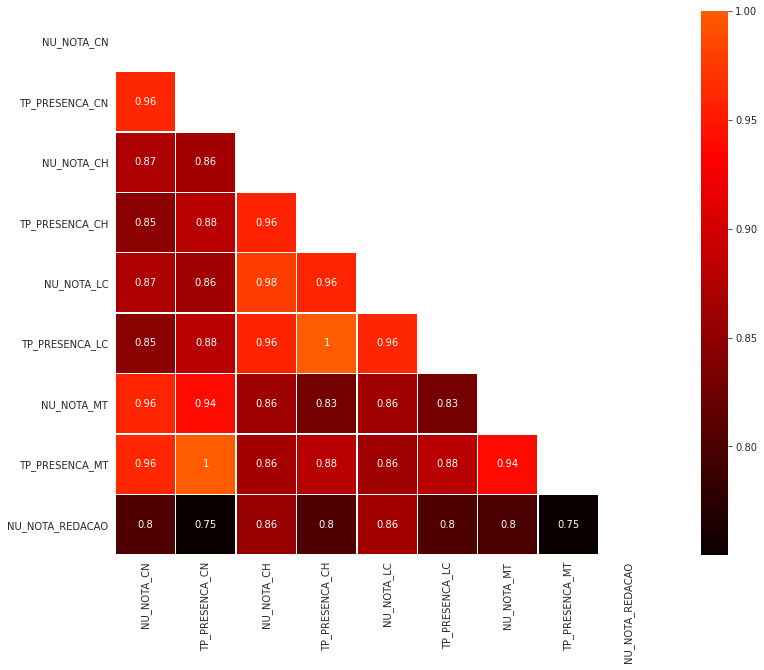

In [0]:
corr_com_presenca = notas_x_presenca.corr()
plt.figure(figsize=(15,10))
mask = np.zeros_like(corr_com_presenca)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_com_presenca, annot=True, cbar=True, center=1,linewidths=.5, cmap='hot', mask=mask, square=True)
plt.show()

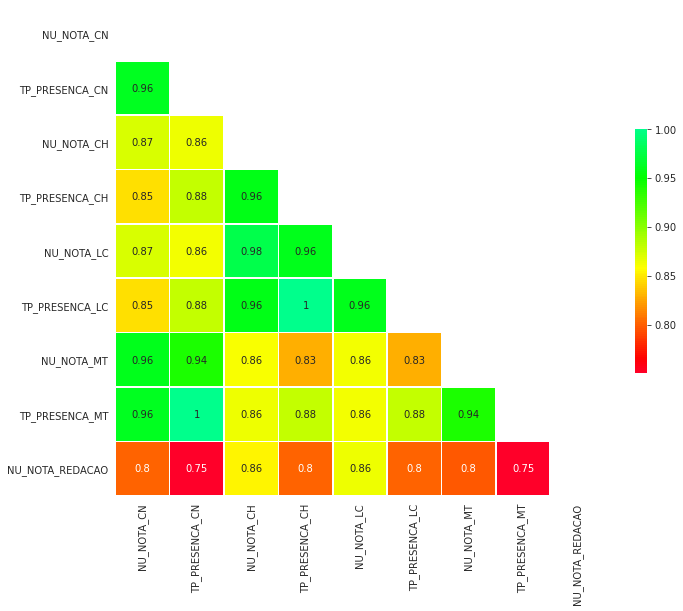

In [0]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_com_presenca, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_com_presenca, mask=mask, cmap="gist_rainbow", center=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

##Desafio 3: pairplot das correlaçoes da quantidade de acertos de cada categoria (CN, CH, MT, LC, NOTA PURA DA REDAÇÃO) gabaritoxrespostas

In [0]:
#copiado na cara dura da Giulia Valvano, incluindo a função que criei para colocar os zeros nas notas.

# Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)
# Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas
nova_base_com_zeros = base_de_trabalho.copy()

# CIENCIAS NATUREZA
altera_colunas_com_loc(nova_base_com_zeros, 'CN', 'CN')
# CIENCIAS HUMANAS
altera_colunas_com_loc(nova_base_com_zeros,'CH','CH')
# MATEMATICA
altera_colunas_com_loc(nova_base_com_zeros,'MT','MT')
#LINGUAGEM
altera_colunas_com_loc(nova_base_com_zeros,'LC','LC')
#REDACAO
altera_colunas_com_loc(nova_base_com_zeros,'LC','REDACAO')



In [0]:
#aqui é copyXcola:
# selecionando apenas as colunas que vou utilizar e tiro os NaN
#limpeza de base
respostas = nova_base_com_zeros[['TX_RESPOSTAS_CN','TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN',
 'TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT', 'NU_NOTA_REDACAO']].dropna()

In [0]:
# ESSA PARTE EU VI NO COLAB DO THIAGO SOUZA visto no Colab da Giulia, CREDITOS PRA ELEs
#transformando o vetor de notas e gabaritos em arrays

# separando em arrays
CN_resp = respostas["TX_RESPOSTAS_CN"].values
CN_gab = respostas["TX_GABARITO_CN"].values

CH_resp = respostas["TX_RESPOSTAS_CH"].values
CH_gab = respostas["TX_GABARITO_CH"].values

LC_resp = respostas["TX_RESPOSTAS_LC"].values
LC_gab = respostas["TX_GABARITO_LC"].values

MT_resp = respostas["TX_RESPOSTAS_MT"].values
MT_gab = respostas["TX_GABARITO_MT"].values

In [0]:
#continuação. 
#uma vez separando os arrays, começa o trabalho de comparação de strings

#Função copiada de outros colabs
#Função que recebe 2 arrays, e compara as strings que estão dentro de cada array.
#Por exemplo, comparo o item 0 da lista de respostas, com o item 1 da lista de gabarito.
#O count serve para que sempre que for encontrado uma igualdade entre resposta e gabarito, seja atribuido +1, formando assim a quantidade de acertos.
#Pega-se o count e coloca dentro de uma lista
#A função retorna essa lista com os valores de acertos.
def acertos(arrayR, arrayG):
  quant_acertos = []
  for c in range(len(arrayR)):
    count = 0
    for i in range(45):
      if (arrayR[c][i] == arrayG[c][i]):
        count += 1
    quant_acertos.append(count)   
  return quant_acertos   


respostas['acertos_cn'] = acertos(CN_resp, CN_gab)
respostas['acertos_ch'] = acertos(CH_resp, CH_gab)
respostas['acertos_lc'] = acertos(LC_resp, LC_gab)
respostas['acertos_mt'] = acertos(MT_resp, MT_gab)

# sendo assim foi criado um novo df de respostas

respostas.head()

TX_RESPOSTAS_CN  ... acertos_mt
1  CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC  ...         22
2  AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC  ...          6
3  BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB  ...         10
6  BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB  ...          8
8  CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE  ...         13

[5 rows x 13 columns]

In [0]:
#a partir daqui sou eu mesma
#vou criar colunas com as notas com base mil para que haja uma correlação direta com as notas de redação
respostas['nota_cn_pura'] = (respostas['acertos_cn'] / 45)*1000
respostas['nota_ch_pura'] = (respostas['acertos_ch'] / 45)*1000
respostas['nota_lc_pura'] = (respostas['acertos_lc'] / 45)*1000
respostas['nota_mt_pura'] = (respostas['acertos_mt'] / 45)*1000
respostas.head()

TX_RESPOSTAS_CN  ... nota_mt_pura
1  CCAADAEEDCDAEEABADDECACBEEDDBDCCCEDACCADAACAC  ...       488.89
2  AEEEBDBBCADADBBCCCDCCBEEDABACAACCADDBBDACBAAC  ...       133.33
3  BBDEDDDCDACDADBBBCEAACAAAACECBCADEDBECCAADACB  ...       222.22
6  BBCCAAECEACBCADDAECABCEBDDADCCEACDBCEBCAABDEB  ...       177.78
8  CEDADAADADEBBAEABCBEDEBCEBEEDCAACEADBDEBDCBDE  ...       288.89

[5 rows x 17 columns]

In [0]:
#testando a correlação nota x acertos
respostas[['nota_lc_pura', 'acertos_lc']].corr()

nota_lc_pura  acertos_lc
nota_lc_pura          1.00        1.00
acertos_lc            1.00        1.00

In [0]:
respostas[['nota_cn_pura', 'acertos_cn']].corr()

nota_cn_pura  acertos_cn
nota_cn_pura          1.00        1.00
acertos_cn            1.00        1.00

In [0]:
respostas[['nota_ch_pura', 'acertos_ch']].corr()

nota_ch_pura  acertos_ch
nota_ch_pura          1.00        1.00
acertos_ch            1.00        1.00

In [0]:
respostas[['nota_mt_pura', 'acertos_mt']].corr()

nota_mt_pura  acertos_mt
nota_mt_pura          1.00        1.00
acertos_mt            1.00        1.00

<function matplotlib.pyplot.show>

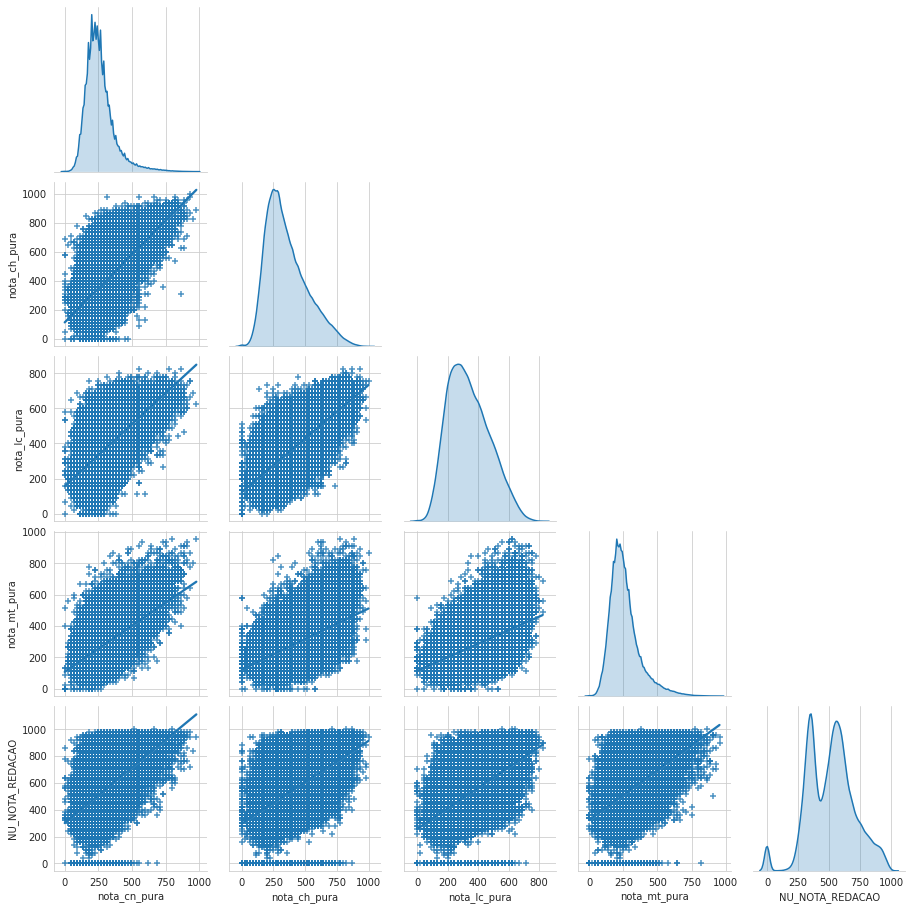

In [0]:
#criando o pairplot 
base_notas=respostas[["nota_cn_pura", "nota_ch_pura" ,  "nota_lc_pura" ,  "nota_mt_pura", "NU_NOTA_REDACAO"]]
sns.pairplot(data=base_notas, kind="reg", corner=True, diag_kind="kde", markers="+", dropna=True)
plt.show


In [0]:
base_notas.corr()

nota_cn_pura  nota_ch_pura  ...  nota_mt_pura  NU_NOTA_REDACAO
nota_cn_pura             1.00          0.62  ...          0.57             0.48
nota_ch_pura             0.62          1.00  ...          0.57             0.54
nota_lc_pura             0.56          0.73  ...          0.53             0.56
nota_mt_pura             0.57          0.57  ...          1.00             0.44
NU_NOTA_REDACAO          0.48          0.54  ...          0.44             1.00

[5 rows x 5 columns]

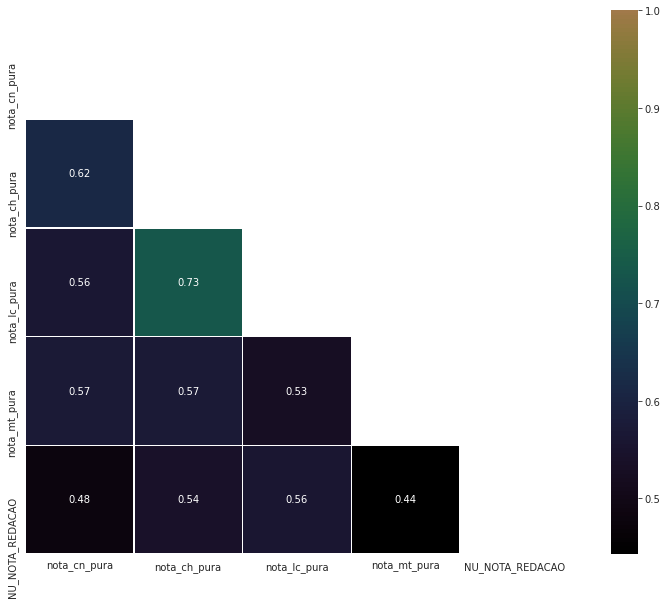

In [0]:
#criando um heatmap pois a visualização é mais simples
corr_notas = base_notas.corr()
plt.figure(figsize=(15,10))
mask = np.zeros_like(corr_notas)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_notas, annot=True, cbar=True, center=1,linewidths=.5, cmap='cubehelix', mask=mask, square=True)
plt.show()

##Desafio 4: Se tirarmos uma prova, podemos prever quanto a pessoa tiraria nessa prova?


pelos gráficos abaixo, as notas possuem uma alta correlação entre si. Entre elas, aparentemente a nota de redação é a mais provável de ajudar na predição

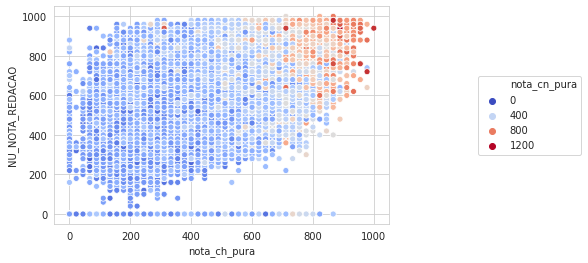

In [0]:
#fazendo scatter redação x notas CH com hue em CN
g = sns.scatterplot(data=respostas, x='nota_ch_pura', y='NU_NOTA_REDACAO', hue='nota_cn_pura', palette='coolwarm')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

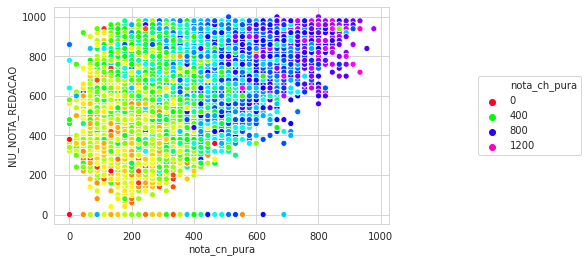

In [0]:
#fazendo scatter redação x notas CN com hue em CH
g = sns.scatterplot(data=respostas, x='nota_cn_pura', y='NU_NOTA_REDACAO', hue='nota_ch_pura',palette='gist_rainbow' )
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()


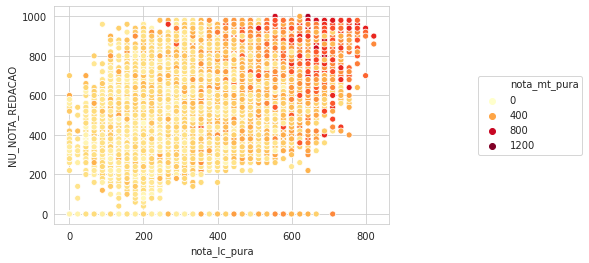

In [0]:
#fazendo scatter redação x notas LC com hue em MT
g = sns.scatterplot(data=respostas, x='nota_lc_pura', y='NU_NOTA_REDACAO', hue='nota_mt_pura',palette='YlOrRd' )
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

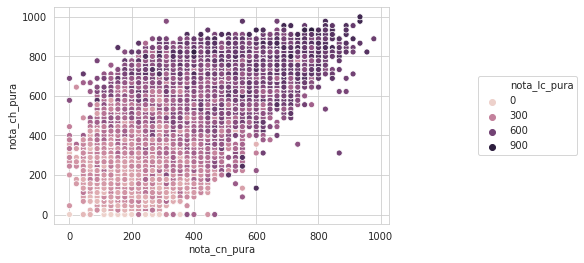

In [0]:
#fazendo scatter CN x CH com hue em LC
g = sns.scatterplot(data=respostas, x='nota_cn_pura', y='nota_ch_pura', hue='nota_lc_pura' )
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

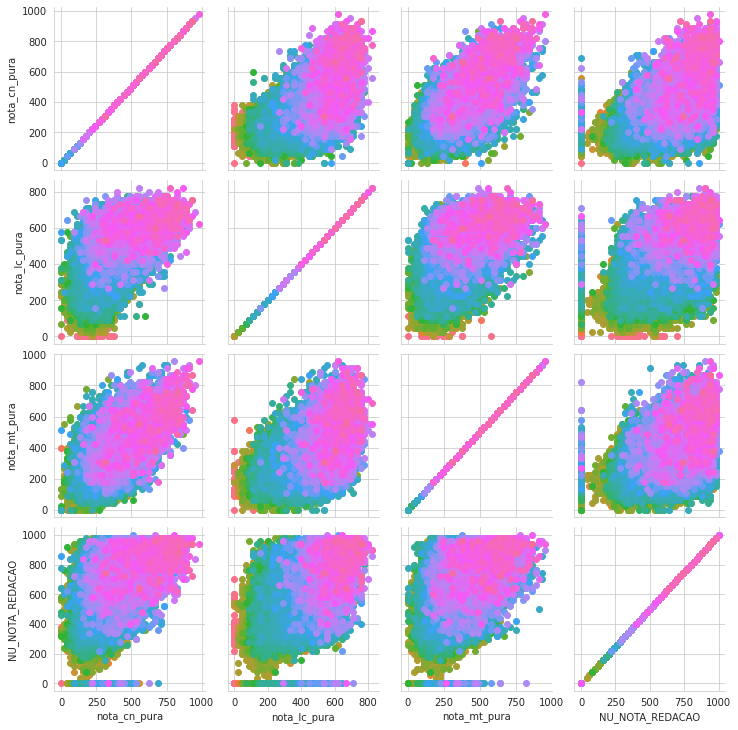

In [0]:
#tentando um PairGrid com Hue na nota de ciencias humanas
graph = sns.PairGrid(base_notas, hue="nota_ch_pura")
graph.map(plt.scatter)
plt.show()

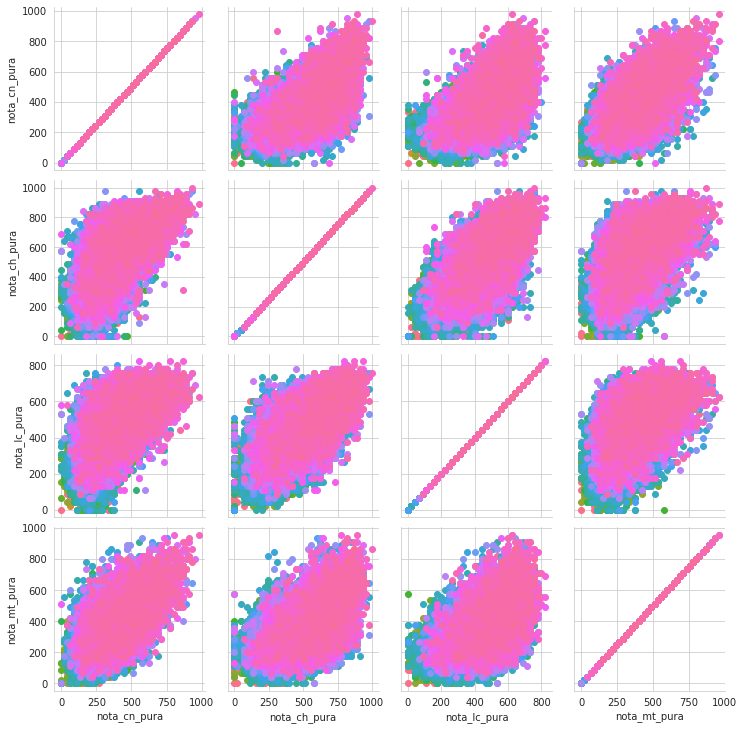

In [0]:
#pairGRid notas redação
graph = sns.PairGrid(base_notas, hue="NU_NOTA_REDACAO")
graph.map(plt.scatter)
plt.show()

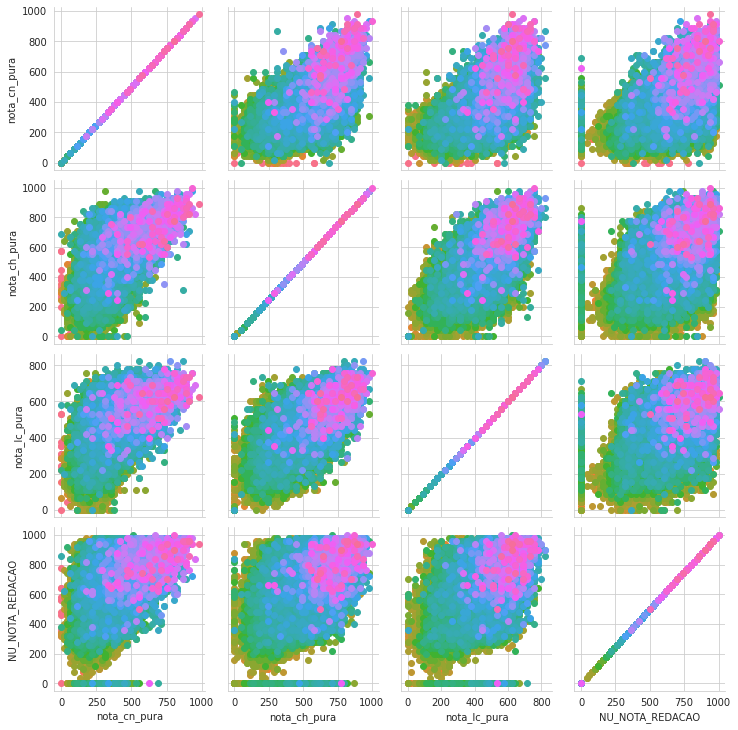

In [0]:
#pairGRid Hue Matemática
graph = sns.PairGrid(base_notas, hue="nota_mt_pura")
graph.map(plt.scatter)
plt.show()

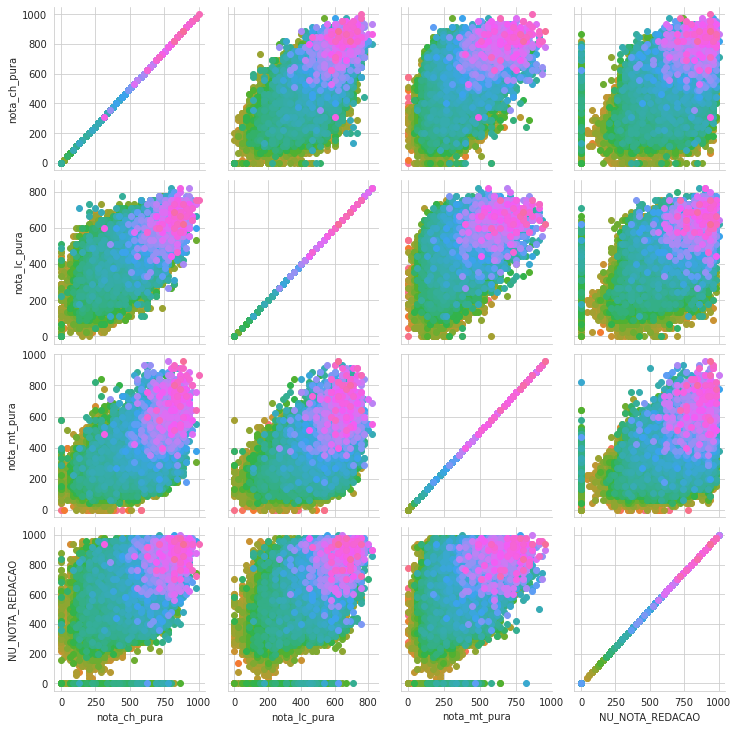

In [0]:
#pairGRid Hue Nota Ciências Naturais
graph = sns.PairGrid(base_notas, hue="nota_cn_pura")
graph.map(plt.scatter)
plt.show()

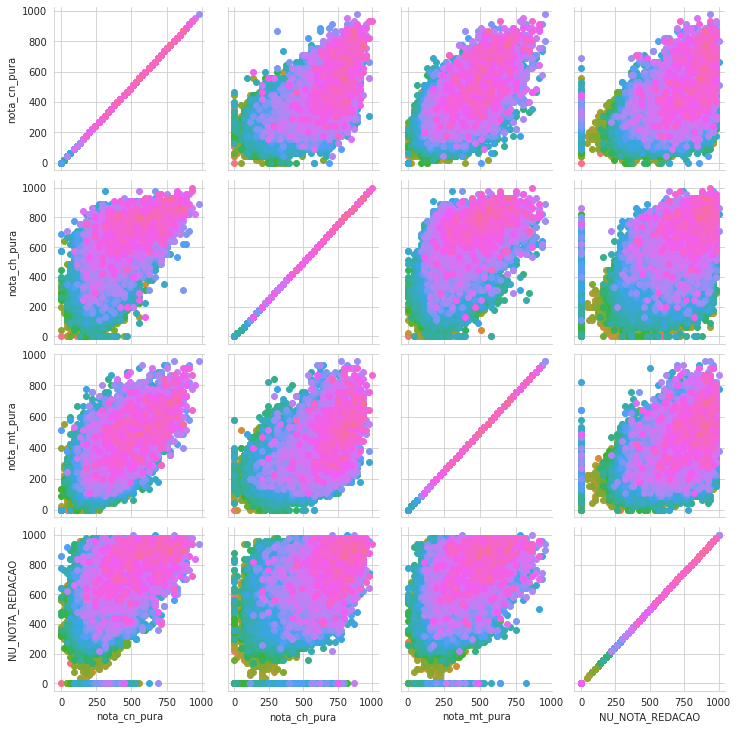

In [0]:
#PairGrid com hue em Linguagem
graph = sns.PairGrid(base_notas, hue="nota_lc_pura")
graph.map(plt.scatter)
plt.show()

##Desafio 5: Remover todos os 0s. (salvar em outro dataset)

In [0]:
#juntando as bases
nova_base_sem_zeros = nova_base_com_zeros.merge(respostas)
base_sem_zeros = nova_base_sem_zeros.copy()
base_sem_zeros.head()


NU_INSCRICAO  NU_ANO  ...  nota_lc_pura nota_mt_pura
0  180012890374    2018  ...        666.67       488.89
1  180008223824    2018  ...        177.78       133.33
2  180007859645    2018  ...        222.22       222.22
3  180009943059    2018  ...        311.11       177.78
4  180008290373    2018  ...        333.33       288.89

[5 rows x 145 columns]

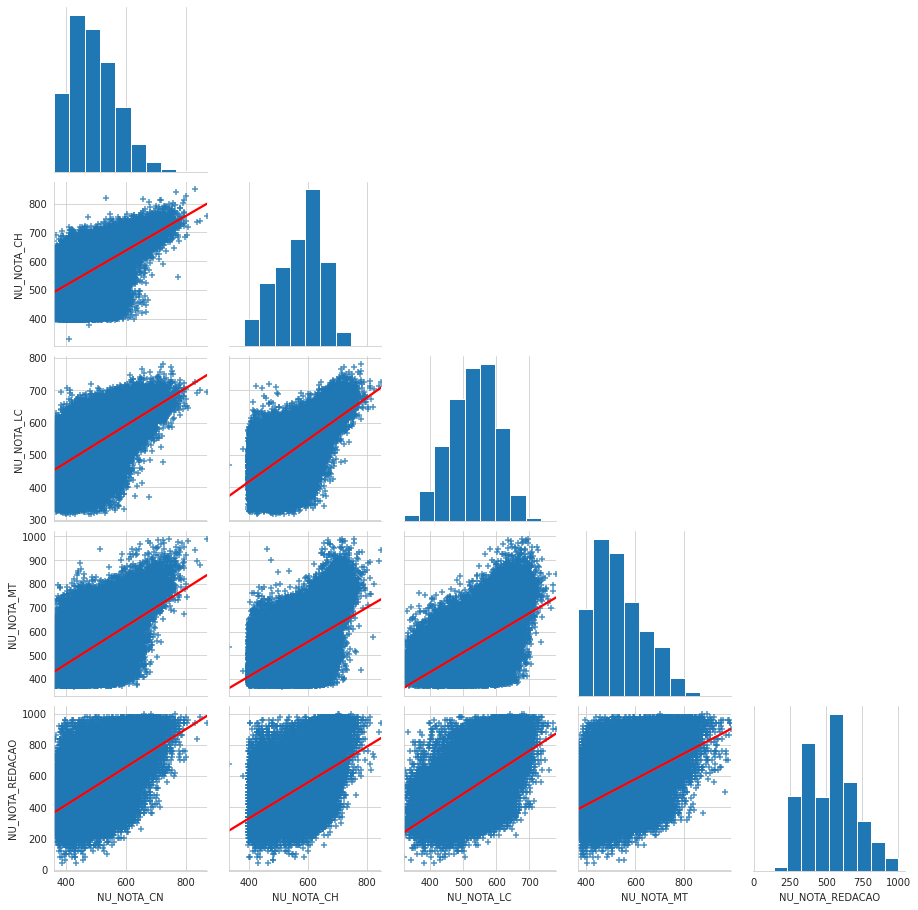

NU_NOTA_CN  NU_NOTA_CH  ...  NU_NOTA_MT  NU_NOTA_REDACAO
NU_NOTA_CN             1.00        0.58  ...        0.58             0.53
NU_NOTA_CH             0.58        1.00  ...        0.54             0.52
NU_NOTA_LC             0.60        0.70  ...        0.57             0.57
NU_NOTA_MT             0.58        0.54  ...        1.00             0.50
NU_NOTA_REDACAO        0.53        0.52  ...        0.50             1.00

[5 rows x 5 columns]

In [0]:
#Copiado Walter Gadelha
respostas_sem_zeros = base_sem_zeros[["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_LC","NU_NOTA_MT","NU_NOTA_REDACAO"]].copy()

# Referência:
# https://stackoverflow.com/questions/27020312/drop-row-in-pandas-dataframe-if-any-value-in-the-row-equals-zero/27020741

respostas_sem_zeros = respostas_sem_zeros[~(respostas_sem_zeros == 0).any(axis=1)]

sns.pairplot(respostas_sem_zeros,
             kind='reg', plot_kws={'line_kws':{'color':'red'}},
             markers="+",
             corner=True)
plt.show()

respostas_sem_zeros.corr()

##Desafio 6: Analisar quais as questões com mais acertos e erros (análise sobre o gabarito X acertos X erros)

In [0]:
#solução roubada do Ederson, para estudar com calma mais tarde

# Baseado desafio Higor
desc_cores = {
  "CN": {
    447: "Azul",
    448: "Amarela",
    449: "Cinza",
    450: "Rosa",
    463: "Laranja - Adaptada Ledor",
    467: "Verde - Videoprova - Libras",
    487: "Amarela (Reaplicação)",
    488: "Cinza (Reaplicação)",
    489: "Azul (Reaplicação)",
    490: "Rosa (Reaplicação)",
  },
  "CH": {
    451: "Azul",
    452: "Amarela",
    453: "Branca",
    454: "Rosa",
    464: "Laranja - Adaptada Ledor",
    468: "Verde - Videoprova - Libras",
    491: "Azul (Reaplicação)",
    492: "Amarelo (Reaplicação)",
    493: "Branco (Reaplicação)",
    494: "Rosa (Reaplicação)",
  },
  "LC": {
    455: "Azul",
    456: "Amarela",
    457: "Rosa",
    458: "Branca",
    465: "Laranja - Adaptada Ledor",
    469: "Verde - Videoprova - Libras",
    495: "Azul (Reaplicação)",
    496: "Amarelo (Reaplicação)",
    497: "Branca (Reaplicação)",
    498: "Rosa (Reaplicação)",
  },
  "MT": {
    459: "Azul",
    460: "Amarela",
    461: "Rosa",
    462: "Cinza",
    466: "Laranja - Adaptada Ledor",
    470: "Verde - Videoprova - Libras",
    499: "Amarela (Reaplicação)",
    500: "Cinza (Reaplicação)",
    501: "Azul (Reaplicação)",
    502: "Rosa (Reaplicação)",
  }
}

desc_tipos = {
    "CN": "Ciências da Natureza",
    "CH": "Ciências Humanas",
    "LC": "Linguagens e Códigos",
    "MT": "Matemática"
}

def processa_linha(linha, tipo):
  resp = linha["TX_RESPOSTAS_"+tipo]
  gab = linha["TX_GABARITO_"+tipo]
  res = dict()

  for i in range(len(resp)):
    if resp[i] == 9:
      continue
    res[i+1] = (resp[i] != gab[i]) * 1 # CHECANDO POR ERROS
  
  return pd.Series(res)

maior_indice = -1
maior_valor = -1
maior_cor = "Nenhum"
maior_tipo = "CH"

for tipo in ["CN", "CH", "MT", "LC"]:
  cores = base_sem_zeros[f"CO_PROVA_{tipo}"].unique()
  colunas_eixo_x = [str(i) for i in range(1, 46)]
  for cor in cores:
    tmp = base_sem_zeros.query(f"CO_PROVA_{tipo} == {cor}")[[f"TX_RESPOSTAS_{tipo}", f"TX_GABARITO_{tipo}"]].apply(processa_linha, args=[tipo], axis=1).sum()

    idxmax = tmp.idxmax()

    if maior_valor < tmp[idxmax]:
      maior_indice = idxmax
      maior_valor = tmp[idxmax]
      maior_cor = cor
      maior_tipo = tipo

print("Questão com mais erros: ")
print(f"Prova  : {desc_tipos[maior_tipo]} ({maior_tipo}) - {desc_cores[maior_tipo][int(maior_cor)]} ({maior_cor})")
print(f"Questão: {maior_indice} (primeira questão = 1)")
print(f"Erros  : {maior_valor}")

Questão com mais erros: 
Prova  : Matemática (MT) - Azul (459.0)
Questão: 28 (primeira questão = 1)
Erros  : 24384


##Desafio 7: Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science (Podcast do datahackers sobre o assunto)


In [0]:
#teste 3, solução slack

#sum(a==b for a, b in zip(respostas, gabarito))
#sum(c==d for c, d in zip(a,b)) for a, b in zip(respostas, gabarito)
#dados_nota_2.dropna(subset=['TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT'], inplace=True)

## Outras Análises

In [0]:
#percentual de eliminações x correlação entre eliminados e notas em outras provas

In [0]:
#teste 1 - tentando comparar dados
dados['TX_RESPOSTAS_CN'].equals(dados['TX_GABARITO_CN'])

False

In [0]:
#teste 2 - tentando comparar os dados
dados['TX_RESPOSTAS_CN'].eq(dados['TX_GABARITO_CN'])

0         False
1         False
2         False
3         False
4         False
          ...  
137839    False
137840    False
137841    False
137842    False
137843    False
Length: 137844, dtype: bool

In [0]:
#respostas_cn = dados['TX_RESPOSTAS_CN'].apply(lambda x:pd.Series(list(x)))
#gabarito_cn = dados['TX_GABARITO_CN'].apply(lambda x: pd.Series(list(x)))
#acertos_CN = respostas_cn == gabarito_cn
#acertos_CN

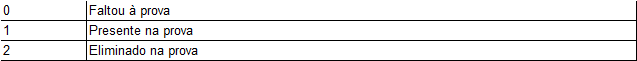

#AULA 5

In [0]:
dados_notas.head()

ciencias_naturais  ciencias_humanas  linguagem_codigo  matematica  redacao
1             523.10            671.30            661.60      738.00   680.00
2             409.20            531.70            389.00      438.10   600.00
3             452.30            505.50            448.50      544.90   400.00
6             428.50            505.20            521.00      436.80   560.00
8             491.80            575.70            524.40      487.60   660.00

In [0]:
#Machine Learning
#treinos  e testes
#supervisionado

#Ex.:
#11 2??? treino
#22 4??? treino
#34 7??? treino

#54 9??? teste



In [0]:
tenho = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x = tenho[['ciencias_naturais','ciencias_humanas']]
x.head()

ciencias_naturais  ciencias_humanas
1             523.10            671.30
2             409.20            531.70
3             452.30            505.50
6             428.50            505.20
8             491.80            575.70

In [0]:
adivinhar = dados_notas['linguagem_codigo']
y_adivinhar = adivinhar
y_adivinhar.head()

1   661.60
2   389.00
3   448.50
6   521.00
8   524.40
Name: linguagem_codigo, dtype: float64

In [0]:
#f(x) === y
from sklearn.model_selection import train_test_split
import numpy as np
#random_state define uma matriz fixa. Neste caso foi usado um número aleatório, exemplo da aula
#x_treino, x_teste, y_treino, y_teste = train_test_split(x,y_adivinhar, random_state = 326784)

#faz a função do random_state, mas aplica a todas as funções usadas
#np.random.seed(43267)


x_treino, x_teste, y_treino, y_teste = train_test_split(x,y_adivinhar, random_state = 326784 )
#devolve x_treino, x_teste, y_treino e y_teste
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)




(72952, 2)
(24318, 2)
(72952,)
(24318,)


In [0]:
x_treino.head()

ciencias_naturais  ciencias_humanas
25012             610.20            651.90
52044             571.70            639.60
86543             385.90            569.10
36362             424.70            446.20
96734             831.40            850.40

In [0]:
from sklearn.svm import LinearSVR
#previsão por regressão linear
modelo = LinearSVR()
modelo.fit(x_treino, y_treino)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
#predicoes nota de linguagem
from sklearn.metrics import mean_squared_error
predicoes_nota_linguagem = modelo.predict(x_teste)
avaliacao = mean_squared_error(y_teste, predicoes_nota_linguagem)
print(f"Minha avaliação nos dados de teste foi de {avaliacao}")
print(predicoes_nota_linguagem[:5].round(1))
print(y_teste[:5])

Minha avaliação nos dados de teste foi de 5361.0699654685895
[627.5 662.9 699.  596.4 504.1]
67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64


In [0]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

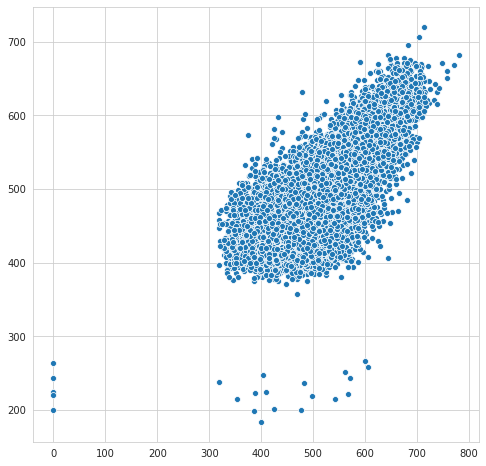

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = predicoes_nota_linguagem )

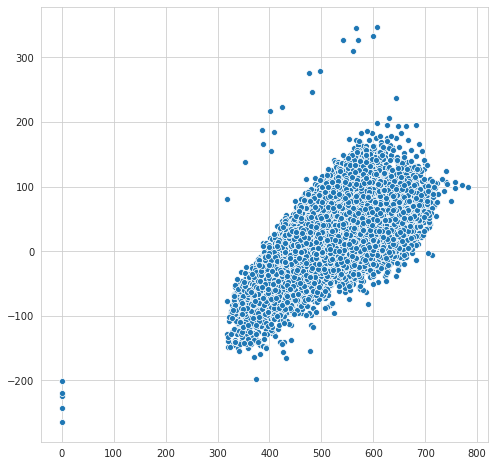

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = y_teste.values - predicoes_nota_linguagem )

In [0]:
#tirando a média de notas por aluno para usá-la como teste de predição mais tosco
novo_treino = x_teste.mean(axis=1)
novo_treino.head()

67300    607.10
113766   630.62
48328    655.92
9454     545.45
9515     491.50
dtype: float64

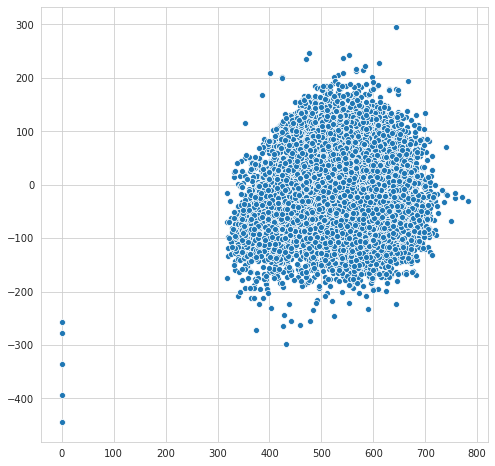

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = y_teste.values - novo_treino.values )

In [0]:
#fazendo uma previsão pela média do y do treino
y_treino.mean()

528.69

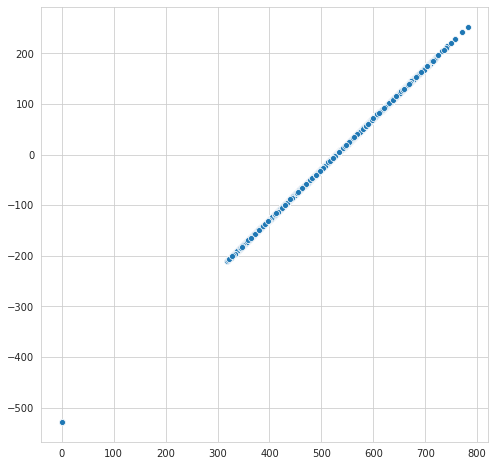

In [0]:
#o erro é igual para todas as notas reais, pq usamos um valor fixo
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = y_teste.values - y_treino.mean() )

In [0]:
from sklearn.svm import SVR

modelo = SVR()
modelo.fit(x_treino, y_treino)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

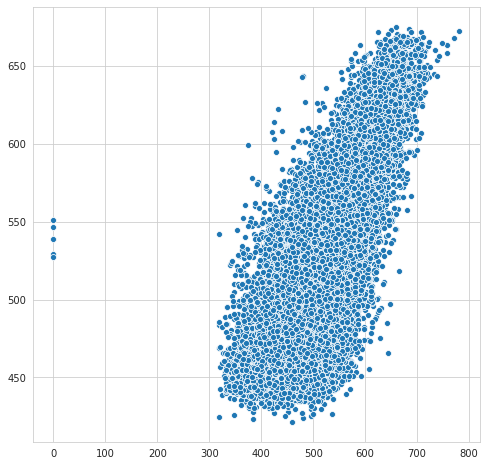

In [0]:
predicoes_nota_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = predicoes_nota_linguagem )

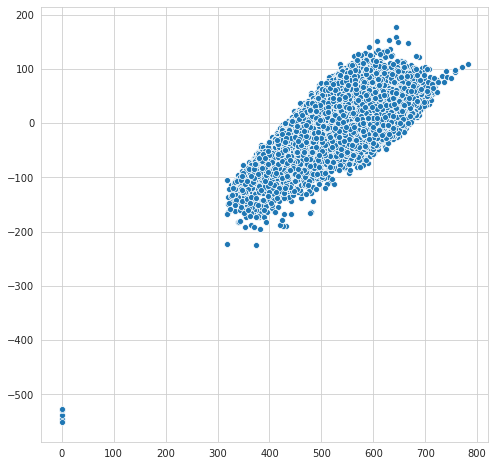

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = y_teste.values - predicoes_nota_linguagem )

In [0]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

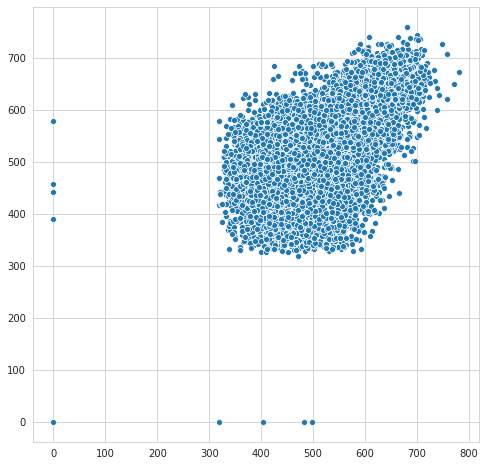

In [0]:
predicoes_nota_linguagem = modelo.predict(x_teste)
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = predicoes_nota_linguagem )

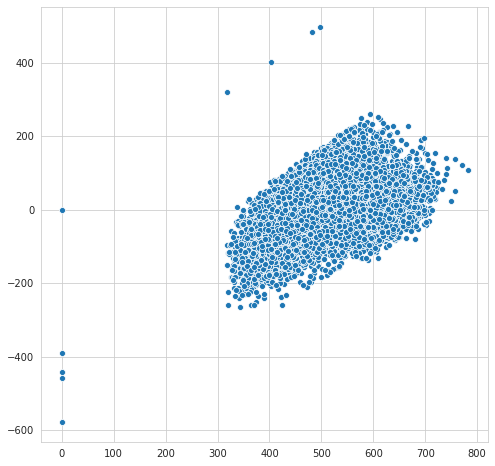

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = y_teste.values - predicoes_nota_linguagem )

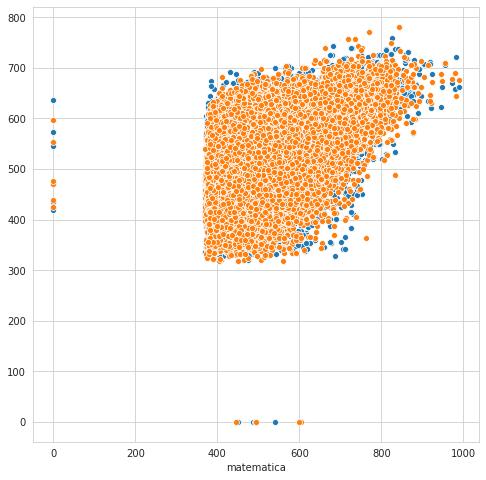

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_teste['matematica'].values, y=predicoes_nota_linguagem)
sns.scatterplot(x=x_teste['matematica'], y=y_teste.values)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste, predicoes_nota_linguagem)

4146.44

In [0]:
mean_squared_error(y_teste, y_teste)

0.00

In [0]:
from sklearn.dummy import DummyRegressor
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes)

5137.48

In [0]:
#mediana como dummy
from sklearn.dummy import DummyRegressor
modelo_dummy = DummyRegressor('median')
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes)

5160.29

##Perguntas do Paulo
- a mediana como dummy vai ser melhor (os zeros puxam a média pra baixo)?
- e se tirarmos os zeros da base?
- Temos mil algoritmos, dois mil parâmetros para cada algoritmo. Por melhor que a pessoa seja, o que fazer? Dá pra rodar todos e com todos os parâmetros?

###Respostas do Pessoal da Aula
- Não (vide teste ali acima)
- É possível fazer vários testes de uma vez. Existe um autoML

##Desafio 1 - Explore os parâmetros C e o max_iter. Não há garantias que o resultado será melhor

In [0]:
from sklearn.svm import LinearSVR
#not much better - vamos testar outros parâmetros
modelo = LinearSVR(C=0.5, max_iter=5000)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.5, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=5000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
predicoes_nota_linguagem_teste_1 = modelo.predict(x_teste)
print(predicoes_nota_linguagem_teste_1[:5])
print(y_teste[:5])

[485.04308267 498.37578526 522.57694019 460.59477058 397.77680191]
67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64


In [0]:
mean_squared_error(y_teste, predicoes_nota_linguagem_teste_1)

9413.79

In [0]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes)

5137.48

####teste 2

In [0]:
modelo = LinearSVR(C=2.0, max_iter=5000)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=2.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=50000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
predicoes_nota_linguagem_teste_2 = modelo.predict(x_teste)
print(predicoes_nota_linguagem_teste_2[:5])
print(y_teste[:5])

[609.00223391 626.0035768  657.67113021 575.55511929 494.47192461]
67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64


In [0]:
mean_squared_error(y_teste, predicoes_nota_linguagem_teste_2)

2807.94

In [0]:
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes)

5137.48

####teste_3

In [0]:
modelo = LinearSVR(C=0.1, max_iter=4000)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=4000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
predicoes_nota_linguagem_teste_3 = modelo.predict(x_teste)
print(predicoes_nota_linguagem_teste_3[:5])
print(y_teste[:5])
mean_squared_error(y_teste, predicoes_nota_linguagem_teste_3)

[597.92554734 613.27587094 642.44680276 554.96274097 475.09271969]
67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64


2278.39

####teste 4

In [0]:
modelo = LinearSVR(C=0.2, max_iter=10000)
modelo.fit(x_treino, y_treino)
predicoes_nota_linguagem_teste_4 = modelo.predict(x_teste)
print(predicoes_nota_linguagem_teste_4[:5])
print(y_teste[:5])
mean_squared_error(y_teste, predicoes_nota_linguagem_teste_4)

[585.5474377  599.86390771 627.8339758  545.92829974 470.5423409 ]
67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


2165.39

##Desafio 2 Plotar no eixo x a média das 4 notas ao invés de uma só

In [0]:
y_teste[:5]

67300    577.20
113766   624.40
48328    703.00
9454     598.60
9515     458.60
Name: linguagem_codigo, dtype: float64

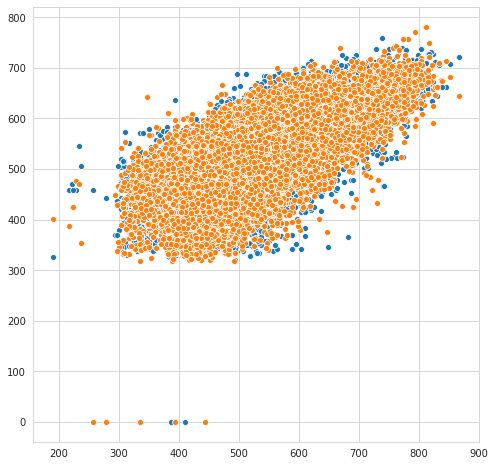

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_teste.mean(axis=1), y=predicoes_nota_linguagem)
sns.scatterplot(x=x_teste.mean(axis=1), y=y_teste.values)

##Desafio 3 - Testar os modelos sem os zeros.

In [0]:
respostas_sem_zeros.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_LC  NU_NOTA_MT  NU_NOTA_REDACAO
0      523.10      671.30      661.60      738.00           680.00
1      409.20      531.70      389.00      438.10           600.00
2      452.30      505.50      448.50      544.90           400.00
3      428.50      505.20      521.00      436.80           560.00
4      491.80      575.70      524.40      487.60           660.00

In [0]:
tenho = respostas_sem_zeros[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
x_tenho = tenho
x_tenho.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_MT  NU_NOTA_REDACAO
0      523.10      671.30      738.00           680.00
1      409.20      531.70      438.10           600.00
2      452.30      505.50      544.90           400.00
3      428.50      505.20      436.80           560.00
4      491.80      575.70      487.60           660.00

In [0]:
adivinhar = respostas_sem_zeros['NU_NOTA_LC']
y_adivinhar = adivinhar
y_adivinhar.head()

0   661.60
1   389.00
2   448.50
3   521.00
4   524.40
Name: NU_NOTA_LC, dtype: float64

In [0]:


#random_state define uma matriz fixa. Neste caso foi usado um número aleatório, exemplo da aula
#x_treino, x_teste, y_treino, y_teste = train_test_split(x,y_adivinhar, random_state = 326784)

#faz a função do random_state, mas aplica a todas as funções usadas
#np.random.seed(43267)


x_treino, x_teste, y_treino, y_teste = train_test_split(x_tenho,y_adivinhar, random_state = 326784 )
#devolve x_treino, x_teste, y_treino e y_teste
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)


(71385, 4)
(23796, 4)
(71385,)
(23796,)


In [0]:
#testando DecisionTree
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

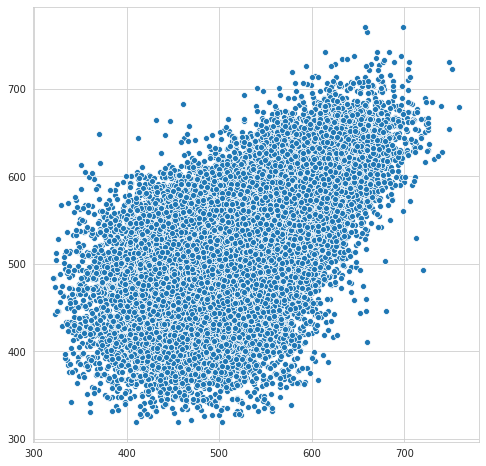

In [0]:
predicoes_nota_linguagem_sem_zeros = modelo.predict(x_teste)
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = predicoes_nota_linguagem_sem_zeros )

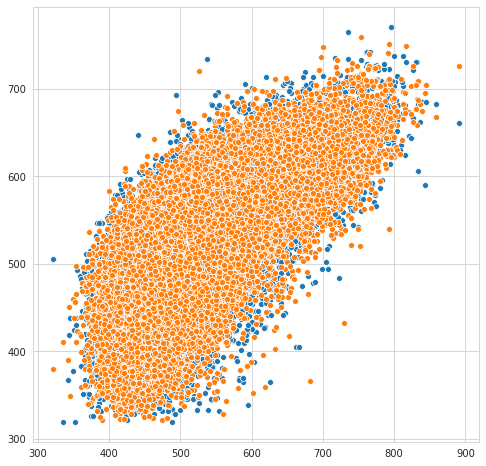

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_teste.mean(axis=1), y=predicoes_nota_linguagem_sem_zeros)
sns.scatterplot(x=x_teste.mean(axis=1), y=y_teste.values)

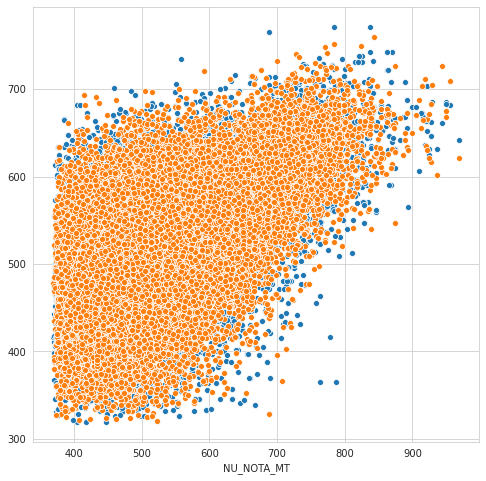

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_teste['NU_NOTA_MT'].values, y=predicoes_nota_linguagem_sem_zeros)
sns.scatterplot(x=x_teste['NU_NOTA_MT'], y=y_teste.values)

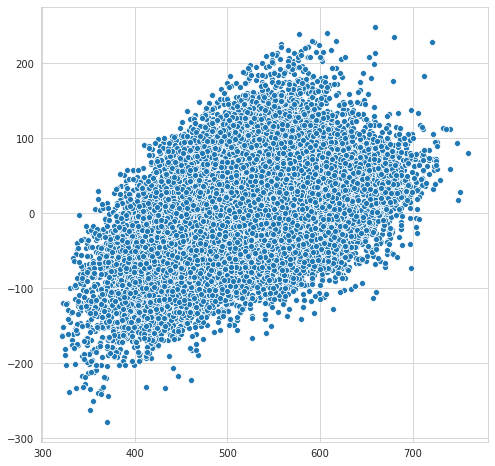

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = y_teste.values - predicoes_nota_linguagem_sem_zeros )

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste, predicoes_nota_linguagem_sem_zeros)

4012.46

In [0]:
from sklearn.dummy import DummyRegressor
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes)

5050.37

In [0]:
#mediana como dummy
from sklearn.dummy import DummyRegressor
modelo_dummy = DummyRegressor('median')
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes)

5064.93

In [0]:
#acurácia do modelo com dummy
modelo.score(x_teste, y_teste)

0.21

In [0]:
y_adivinhar.head

<bound method NDFrame.head of 0       661.60
1       389.00
2       448.50
3       521.00
4       524.40
         ...  
97265   504.80
97266   528.50
97267   538.30
97268   468.10
97269   527.70
Name: NU_NOTA_LC, Length: 95181, dtype: float64>

### testando outro tipo de regressão (Bayesian Regression)

In [0]:
from sklearn import linear_model

modelo = linear_model.BayesianRidge()
modelo.fit(x_treino, y_treino)


BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

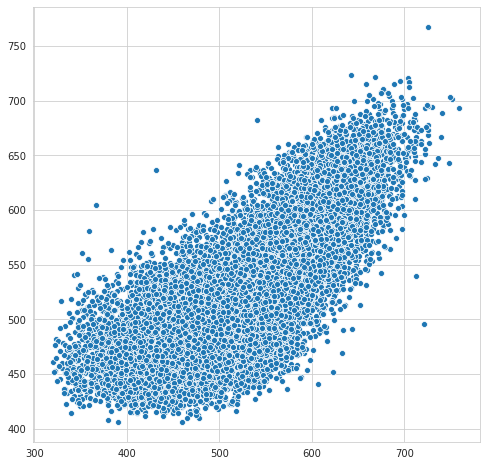

In [0]:
predicoes_nota_linguagem_sem_zeros = modelo.predict(x_teste)
plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = predicoes_nota_linguagem_sem_zeros )

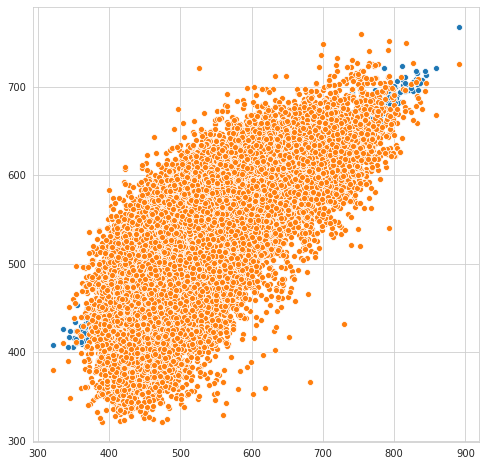

In [0]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=x_teste.mean(axis=1), y=predicoes_nota_linguagem_sem_zeros)
sns.scatterplot(x=x_teste.mean(axis=1), y=y_teste.values)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_teste, predicoes_nota_linguagem_sem_zeros)

2061.92

In [0]:
from sklearn.dummy import DummyRegressor
modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)
mean_squared_error(y_teste, dummy_predicoes)

5050.37

In [0]:
modelo.score(x_teste, y_teste)

0.59

[556.68553311 628.41061915 497.23979349 584.47192638 505.80913805]
47728   601.20
72988   694.10
78330   504.40
27441   609.20
76887   455.80
Name: NU_NOTA_LC, dtype: float64


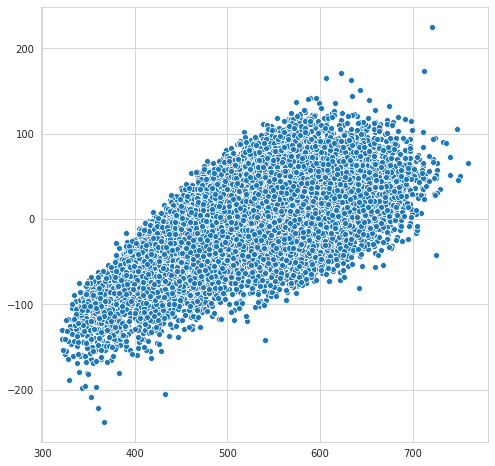

In [0]:
print(predicoes_nota_linguagem_sem_zeros[:5])
print(y_teste[:5])

plt.figure(figsize=(8,8))
sns.scatterplot(x= y_teste.values, y = y_teste.values - predicoes_nota_linguagem_sem_zeros )

###testando outra regressão

In [0]:
#safe to say, it did not work
x_treino, x_teste, y_treino, y_teste = train_test_split(x_tenho,y_adivinhar, random_state = 326784 )
#devolve x_treino, x_teste, y_treino e y_teste
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)

from sklearn.linear_model import SGDRegressor
modelo = SGDRegressor()
modelo.fit(x_treino, y_treino)
predicoes_nota_linguagem_sem_zeros = modelo.predict(x_teste)
print(predicoes_nota_linguagem_sem_zeros[:5])
print(y_teste[:5])
mean_squared_error(y_teste, predicoes_nota_linguagem_sem_zeros)

(71385, 4)
(23796, 4)
(71385,)
(23796,)
[2.11075332e+13 1.97319720e+13 1.36790560e+13 1.84150329e+13
 2.33634259e+13]
47728   601.20
72988   694.10
78330   504.40
27441   609.20
76887   455.80
Name: NU_NOTA_LC, dtype: float64


399786681145572815162834944.00

In [0]:
x_treino.head()

NU_NOTA_CN  NU_NOTA_CH  NU_NOTA_MT  NU_NOTA_REDACAO
25034      638.00      652.20      736.00           720.00
70117      393.90      629.90      394.00           540.00
18230      401.00      524.70      464.10           460.00
37332      454.60      489.90      483.40           600.00
78187      526.20      562.70      478.30           300.00

##Desafio 4 - Interprete tudo o que você fez e a sua conclusão.

A maior parte das projeções vão na mesma direção, mas possuem vieses. Num primeiro momento, ouso dizer que as quatro notas não são um bom preditor para as notas de LC, apesar de alguns modelos possuirem score passível de aplicação. Pretendo ainda testar combos de duas matérias (redação x as outars) com base na aula 4, para confirmar minhas impressões do heat map gerado nos desafios da aula anterior.

##Desafio 5 - Calcule as métricas de erro que utilizamos (mean_square_root_error) também no conjunto de treino e veja o que acontece comparado com o conjunto de teste

In [0]:
tenho = dados_notas[['ciencias_naturais', 'ciencias_humanas', 'matematica', 'redacao']]
x = tenho
adivinhar = dados_notas['linguagem_codigo']
y = adivinhar


x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, random_state = 326784 )
#devolve x_treino, x_teste, y_treino e y_teste
print(x_treino.shape)
print(x_teste.shape)
print(y_treino.shape)
print(y_teste.shape)


modelo = DecisionTreeRegressor()
modelo.fit(x_treino, y_treino)
predicoes_nota_linguagem_desafio = modelo.predict(x_treino)

(72952, 4)
(24318, 4)
(72952,)
(24318,)


In [0]:
mean_squared_error(y_treino, predicoes_nota_linguagem_desafio)
#e olha só, não é um bom preditor.... hehehe

0.00

#Desafio Nintendo Switch quem conseguir a menor mean_square_root_error de uma predição (cfe notebook específico)

In [0]:
#you just wait